***BREAST CANCER PRRDICTION USING SVM***

In [3]:
# Check Python Version
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
scipy: 1.4.1
numpy: 1.18.5
matplotlib: 3.2.2
pandas: 1.1.2
sklearn: 0.22.2.post1


In [4]:
import numpy as np
from sklearn import preprocessing, cross_decomposition
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

In [6]:
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

In [7]:
df = pd.read_csv(url, names=names)

In [8]:
df.head(10)

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [9]:
df.replace('?',+99999,inplace=True)
print(df.axes)
df.drop(['id'],1,inplace=True)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [10]:
print(df.shape)

(699, 10)


In [11]:
print(df.describe())

       clump_thickness  uniform_cell_size  ...     mitoses       class
count       699.000000         699.000000  ...  699.000000  699.000000
mean          4.417740           3.134478  ...    1.589413    2.689557
std           2.815741           3.051459  ...    1.715078    0.951273
min           1.000000           1.000000  ...    1.000000    2.000000
25%           2.000000           1.000000  ...    1.000000    2.000000
50%           4.000000           1.000000  ...    1.000000    2.000000
75%           6.000000           5.000000  ...    1.000000    4.000000
max          10.000000          10.000000  ...   10.000000    4.000000

[8 rows x 9 columns]


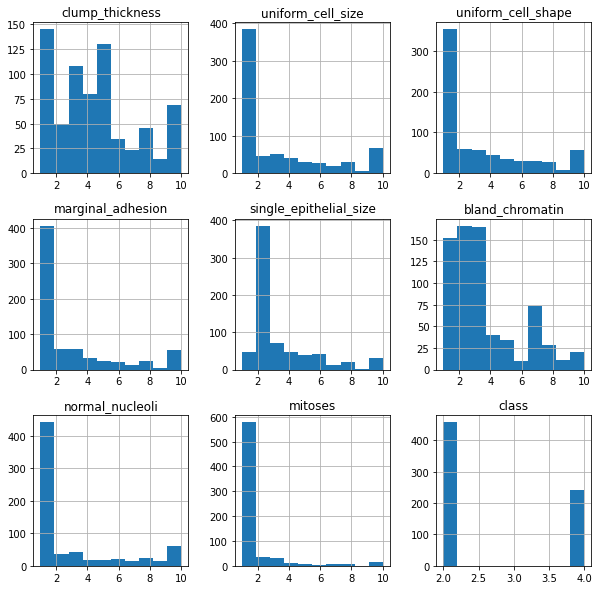

In [12]:
df.hist(figsize=(10,10))
plt.show()

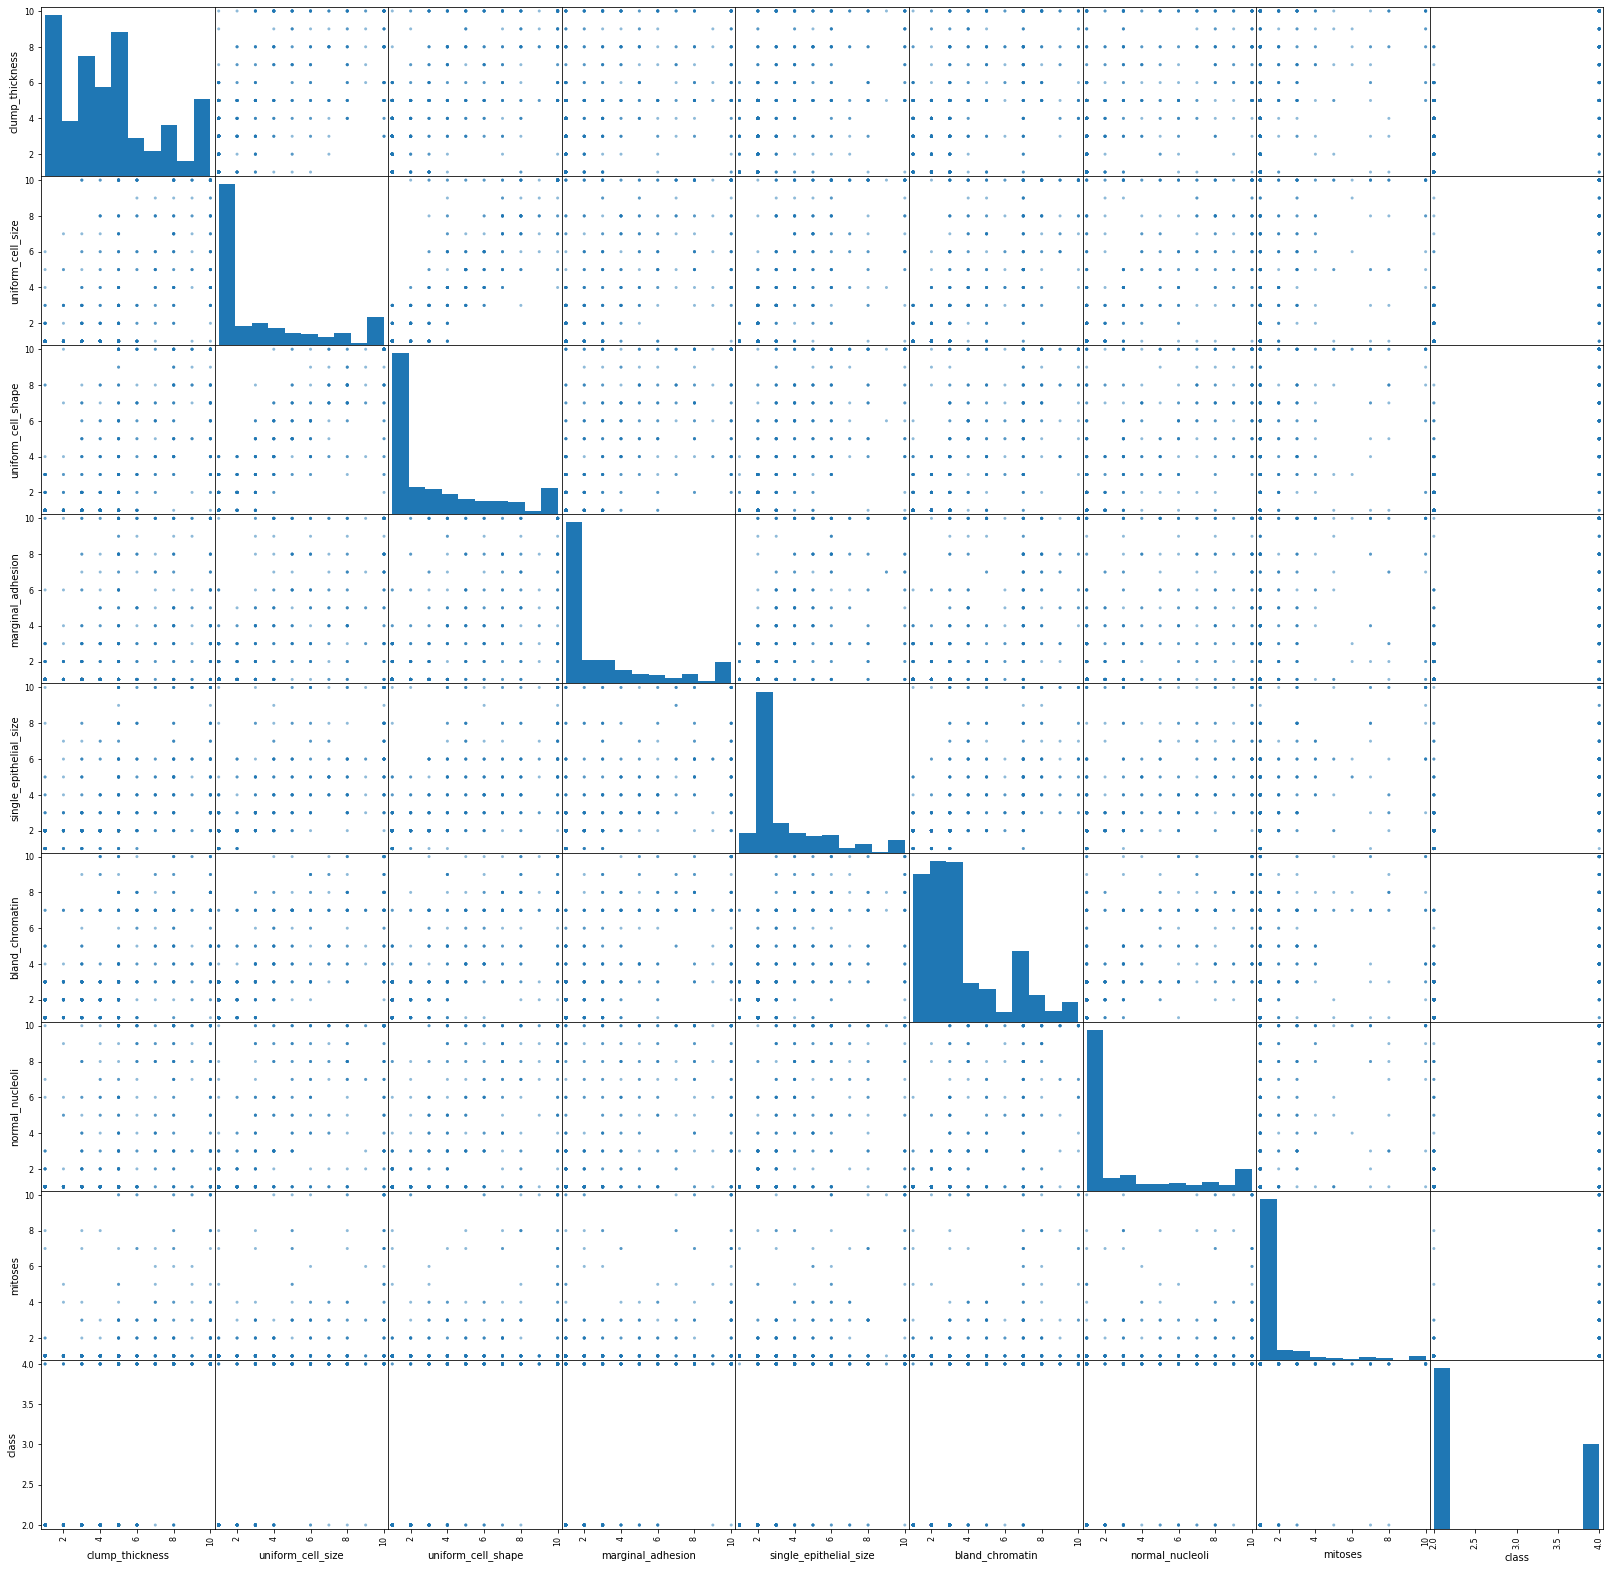

In [19]:
scatter_matrix(df,figsize=(28,28))
plt.show()

In [18]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
x=np.array(df.drop(['class'],1))
y=np.array(df['class'])
X_train, X_test, y_train, y_test =train_test_split(x, y, test_size=0.2)

In [21]:
seed=8
scoring='accuracy'

In [23]:
# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.975000 (0.011845)
SVM: 0.647565 (0.051889)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [27]:
for name,model in models:
  model.fit( X_train,y_train)
  prediction=model.predict(X_test)
  print(name)
  print(accuracy_score(y_test,prediction))
  print(classification_report(y_test,prediction))

KNN
0.9642857142857143
              precision    recall  f1-score   support

           2       0.98      0.97      0.97        96
           4       0.93      0.95      0.94        44

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

SVM
0.6857142857142857
              precision    recall  f1-score   support

           2       0.69      1.00      0.81        96
           4       0.00      0.00      0.00        44

    accuracy                           0.69       140
   macro avg       0.34      0.50      0.41       140
weighted avg       0.47      0.69      0.56       140



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
clf=SVC()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)

0.6857142857142857


In [29]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

[2]


In [30]:
clf= KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)
example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.9642857142857143
[2]
